# The purpose of this notebook is to practice data visualization

Data source: https://www.kaggle.com/shivamb/netflix-shows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import LinearSegmentedColormap
import plotly as py
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Dealing with missing values

In [3]:
# Check for nulls
df.isna().sum()/len(df)

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

Findings: 
- 5 columns have missing values
- 30% of director column is missing 
- 9% of cast info is missing 
- 6% country info missing 

Solutions:
- replace blank countries with the mode (most common) country
- let's not drop missing director and cast for this moment 

In [4]:
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

#check
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


### time variables
- convert the date_added variable into datetime format
- let's make the date into year and month as it could be fun to viz the time pattern

In [6]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018


# Visualization

## Movie and Show Distribution

Text(0.0, 1.2, 'use the Netflix brand colours as palette ')

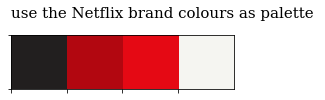

In [7]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("use the Netflix brand colours as palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)

In [8]:
# Ratio of Movie vs TV show
x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

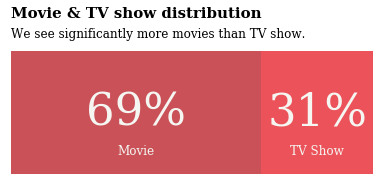

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.7, label='Movie')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#e50914', alpha=0.7, label='TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=45, fontweight='light', fontfamily='serif',
                   color='#f5f5f1')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='#f5f5f1')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=45, fontweight='light', fontfamily='serif',
                   color='#f5f5f1')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='#f5f5f1')


# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see significantly more movies than TV show.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

## Top 10 countries on Netflix

In [10]:
# find the top 10 countries
data = df['country'].value_counts()[0:10]
data

United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
Name: country, dtype: int64

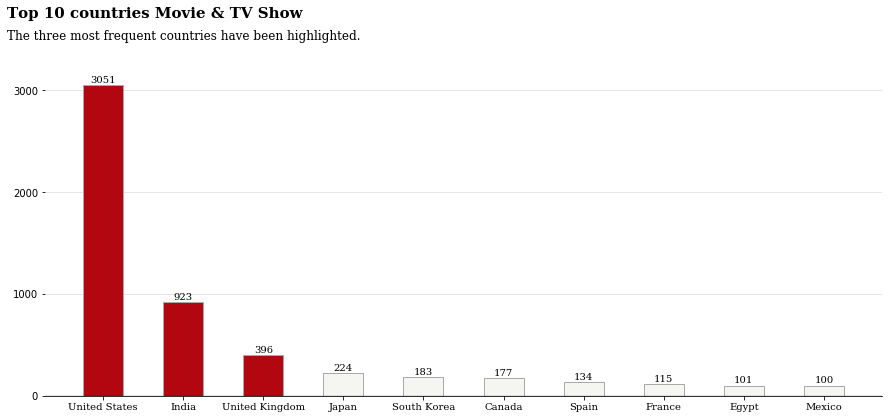

In [11]:
# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[2] = color_map[1] =color_map[0]= '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=1,color=color_map)


#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 50), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries Movie & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 1000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)


plt.show()

In [12]:
country_order = df['country'].value_counts()[:11].index
data_q2q3 = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
data_q2q3_ratio

type,Movie,TV Show
South Korea,0.196721,0.803279
Japan,0.308036,0.691964
United Kingdom,0.487374,0.512626
France,0.600000,0.400000
Mexico,0.650000,0.350000
Spain,0.664179,0.335821
Canada,0.666667,0.333333
United States,0.680433,0.319567
Turkey,0.730000,0.270000
Egypt,0.881188,0.118812


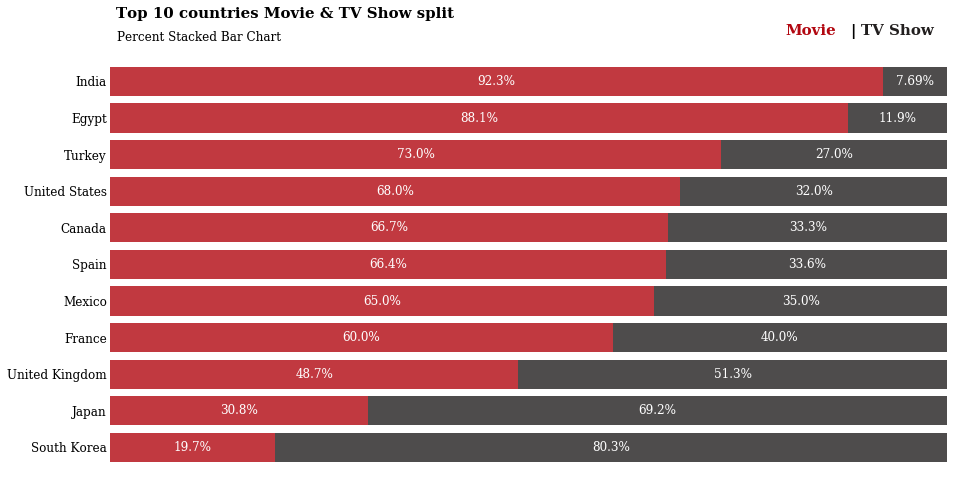

In [13]:
### plot
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

Findings:
 - US has produced way more contents on Neflix than other countries, which makes sense because Netflix is a US company
 - The Movie and TV show proportions vary a lot across those top 10 countries
 - The contents produced by India are focusing mostly on Movies
 - South korea Netflix, on the other hand, in made up of 80% of TV shows

## how has content been added over years?

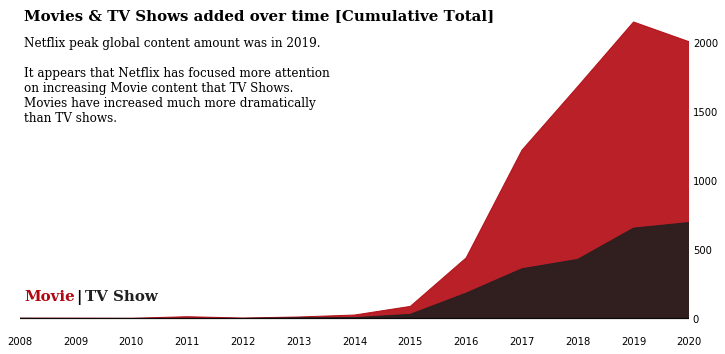

In [14]:
data_sub = df.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''Netflix peak global content amount was in 2019.

It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows.
'''

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

In [15]:
df.groupby('type')['month_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

type,TV Show,Movie
month_added,,
1,197,756
2,143,471
3,198,668
4,181,600
5,172,543
6,165,542
7,197,600
8,204,617
9,204,618


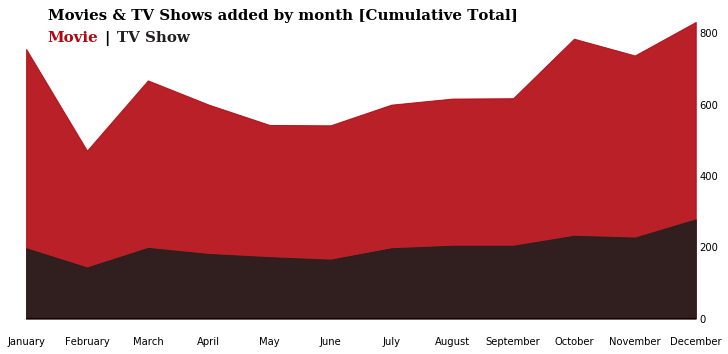

In [16]:
data_sub = df.groupby('type')['month_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(1,12)
plt.xticks(np.arange(1, 13, 1),('January', 'February', 'March', 'April', 'May', 'June', 
                                'July', 'August', 'September', 'October', 'November', 'December'))

fig.text(0.15, 0.85, 'Movies & TV Shows added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.15,0.8,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.215,0.8,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.23,0.8,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

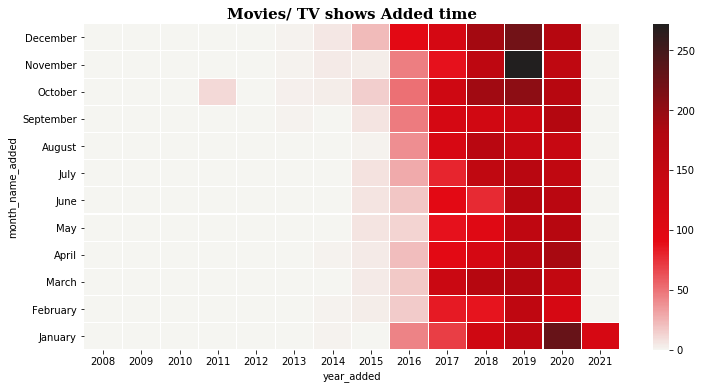

In [17]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df5 = df.groupby('year_added')['month_name_added'].value_counts().unstack().fillna(0)[month_order].T


hc = ['#f5f5f1', '#e50914', '#b20710','#221f1f']
th = [0, 0.1, 0.5, 0.9, 1]

plt.figure(figsize=(12, 6))
sns.heatmap(df5,linewidths = 0.05, cmap=LinearSegmentedColormap.from_list('', ['#f5f5f1', '#e50914', '#b20710','#221f1f']))
plt.title('Movies/ TV shows Added time',fontweight="bold",fontsize=15,fontfamily='serif')
plt.show()

Findings:
- the peak of Netflix content amount is in 2019.
- the amount of movies increased rapidly than TV shows
- some movies were moved offline from Netflix during 2019, while the TV shows were still increasing steadily
- Netflix tends to add new content during November, December and January
- Netflix released faster in most recent years, especially during Nov 2019 to Jan 2020